## IOWA UNIVERSITY https://mesonet.agron.iastate.edu/request/download.phtml?network=ES__ASOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#@title Get metar
station = "LEVX" #@param {type:"string"}
from_year = "2021" #@param {type:"string"}
from_month = "12" #@param {type:"string"}
from_day = "01" #@param {type:"string"}
to_year = "2023" #@param {type:"string"}
to_month = "03" #@param {type:"string"}
to_day = "15" #@param {type:"string"}

import pandas as pd
import numpy as np

s1="https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station="
OACI=station
#s2="&data=drct&data=sknt"
s2="&data=all"
s3="&year1="+from_year+"&month1="+from_month+"&day1="+from_day
s4="&year2="+to_year+"&month2="+to_month+"&day2="+to_day
s5="&tz=Etc%2FUTC&format=onlycomma&latlon=no&missing=M&trace=T&direct=no&report_type=1&report_type=2"
url=s1+OACI+s2+s3+s4+s5
df=pd.read_csv(url,parse_dates=["valid"],).rename({"valid":"time"},axis=1)
df

station                time   tmpf   dwpf   relh    drct  sknt  p01i  \
0        LEVX 2021-12-01 00:00:00  48.20  46.40  93.45  220.00  5.00   0.0   
1        LEVX 2021-12-01 00:30:00  48.20  46.40  93.45  230.00  5.00   0.0   
2        LEVX 2021-12-01 01:00:00  48.20  46.40  93.45  220.00  6.00   0.0   
3        LEVX 2021-12-01 01:30:00  48.20  46.40  93.45  220.00  6.00   0.0   
4        LEVX 2021-12-01 02:00:00  48.20  46.40  93.45  220.00  6.00   0.0   
...       ...                 ...    ...    ...    ...     ...   ...   ...   
23124    LEVX 2023-03-14 21:30:00  50.00  48.20  93.50  210.00  3.00   0.0   
23125    LEVX 2023-03-14 22:00:00  50.00  48.20  93.50  220.00  3.00   0.0   
23126    LEVX 2023-03-14 22:30:00  51.80  50.00  93.55       M  2.00   0.0   
23127    LEVX 2023-03-14 23:00:00  51.80  50.00  93.55  220.00  4.00   0.0   
23128    LEVX 2023-03-14 23:30:00  51.80  50.00  93.55  190.00  3.00   0.0   

        alti mslp  ...  wxcodes ice_accretion_1hr ice_accretion_3hr  \
0      30.33    M  ...        M                 M                 M   
1      30.33    M  ...        M                 M                 M   
2      30.30    M  ...        M                 M                 M   
3      30.30    M  ...        M                 M                 M   
4      30.30    M  ...        M                 M                 M   
...      ...  ...  ...      ...               ...               ...   
23124  30.21    M  ...        M                 M                 M   
23125  30.21    M  ...        M                 M                 M   
23126  30.21    M  ...        M                 M                 M   
23127  30.21    M  ...        M                 M                 M   
23128  30.21    M  ...        M                 M                 M   

      ice_accretion_6hr peak_wind_gust peak_wind_drct peak_wind_time   feel  \
0                     M              M              M              M  45.63   
1                     M              M              M              M  45.63   
2                     M              M              M              M  45.04   
3                     M              M              M              M  45.04   
4                     M              M              M              M  45.04   
...                 ...            ...            ...            ...    ...   
23124                 M              M              M              M  50.00   
23125                 M              M              M              M  50.00   
23126                 M              M              M              M  51.80   
23127                 M              M              M              M  51.80   
23128                 M              M              M              M  51.80   

                                                   metar snowdepth  
0      LEVX 010000Z 22005KT 9999 BKN025 OVC050 09/08 ...         M  
1      LEVX 010030Z 23005KT 9999 BKN016 OVC045 09/08 ...         M  
2      LEVX 010100Z 22006KT 9999 OVC014 09/08 Q1026 N...         M  
3      LEVX 010130Z 22006KT 9999 OVC012 09/08 Q1026 N...         M  
4      LEVX 010200Z 22006KT 9000 OVC011 09/08 Q1026 N...         M  
...                                                  ...       ...  
23124  LEVX 142130Z 21003KT 9999 FEW032 10/09 Q1023 T...         M  
23125  LEVX 142200Z 22003KT 180V250 9999 FEW013 SCT03...         M  
23126  LEVX 142230Z VRB02KT 9999 SCT030 OVC035 11/10 ...         M  
23127  LEVX 142300Z 22004KT 9999 FEW014 BKN029 OVC034...         M  
23128  LEVX 142330Z 19003KT 170V230 9999 FEW028 OVC03...         M  

[23129 rows x 30 columns]

In [ ]:
!pip install klib
import klib

In [2]:
df.columns

Index(['station', 'time', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'metar', 'snowdepth'],
      dtype='object')

In [ ]:
#today metar
from datetime import timedelta
today=pd.to_datetime("today")
# today 
OACI="LEVX"

#url string
s1="https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station="
s2="&data=all"
s3="&year1="+today.strftime("%Y")+"&month1="+today.strftime("%m")+"&day1="+today.strftime("%d")
s4="&year2="+today.strftime("%Y")+"&month2="+today.strftime("%m")+"&day2="+today.strftime("%d")
s5="&tz=Etc%2FUTC&format=onlycomma&latlon=no&missing=M&trace=T&direct=no&report_type=1&report_type=2"
url=s1+OACI+s2+s3+s4+s5
df=pd.read_csv(url,parse_dates=["valid"],).rename({"valid":"time"},axis=1)
df[["time","metar"]].set_index("time")

metar
time                                                                  
2021-06-25 00:00:00       LEVX 250000Z 03003KT CAVOK 19/12 Q1020 NOSIG
2021-06-25 00:30:00       LEVX 250030Z VRB02KT CAVOK 18/13 Q1020 NOSIG
2021-06-25 01:00:00       LEVX 250100Z 00000KT CAVOK 18/13 Q1020 NOSIG
2021-06-25 01:30:00       LEVX 250130Z 23004KT CAVOK 18/13 Q1020 NOSIG
2021-06-25 02:00:00  LEVX 250200Z 24003KT 200V280 CAVOK 18/13 Q1019...
2021-06-25 02:30:00       LEVX 250230Z 24006KT CAVOK 18/13 Q1019 NOSIG
2021-06-25 03:00:00  LEVX 250300Z 23005KT 200V280 CAVOK 17/13 Q1019...
2021-06-25 03:30:00  LEVX 250330Z 25005KT 180V280 CAVOK 17/13 Q1019...
2021-06-25 04:00:00  LEVX 250400Z 24005KT 210V280 CAVOK 16/13 Q1019...
2021-06-25 04:30:00       LEVX 250430Z 22008KT CAVOK 16/13 Q1019 NOSIG
2021-06-25 05:00:00       LEVX 250500Z 23006KT CAVOK 16/13 Q1019 NOSIG
2021-06-25 05:30:00       LEVX 250530Z 22007KT CAVOK 16/13 Q1019 NOSIG
2021-06-25 06:00:00  LEVX 250600Z 23005KT 190V260 CAVOK 16/13 Q1019...
2021-06-25 06:30:00  LEVX 250630Z 22006KT 190V260 CAVOK 16/13 Q1019...
2021-06-25 07:00:00  LEVX 250700Z 21007KT 150V240 CAVOK 16/13 Q1019...
2021-06-25 07:30:00       LEVX 250730Z 21006KT CAVOK 17/14 Q1019 NOSIG
2021-06-25 08:00:00  LEVX 250800Z 20006KT 140V240 CAVOK 19/15 Q1019...
2021-06-25 08:30:00  LEVX 250830Z 21006KT 160V240 CAVOK 20/15 Q1019...
2021-06-25 09:00:00  LEVX 250900Z 19006KT 110V230 CAVOK 22/16 Q1019...
2021-06-25 09:30:00  LEVX 250930Z 20006KT 120V240 CAVOK 23/16 Q1019...
2021-06-25 10:00:00  LEVX 251000Z 20006KT 150V250 CAVOK 24/16 Q1019...

In [3]:
#temperature  dry and dew to Kelvin scale. Fixing errors
df["temp_o"]= round(((pd.to_numeric(df["tmpf"], downcast="float",errors='coerce'))-32)*(5/9)+273.15,0)
df["tempd_o"]=round(((pd.to_numeric(df["dwpf"], downcast="float",errors='coerce'))-32)*(5/9)+273.15,0)
df.loc[df.temp_o>320,"temp_o"]=np.nan
df.loc[df.tempd_o<260,"tempd_o"]=np.nan
#df.loc[df.time=="2017-07-16 00:30:00","temp_o"]=np.nan
print((df.temp_o-df.tempd_o).describe())
print((df[["temp_o","tempd_o"]]-273).describe())
import plotly.express as px
fig = px.line(df,x="time",y="tempd_o", title="temp_o figure")
fig.show()


count    23067.000000
mean         3.956388
std          3.787092
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         25.000000
dtype: float64
             temp_o       tempd_o
count  23067.000000  23067.000000
mean      14.014176     10.057788
std        5.815952      5.283319
min       -1.000000     -7.000000
25%       10.000000      7.000000
50%       13.000000     10.000000
75%       17.000000     14.000000
max       38.000000     22.000000


In [ ]:
import plotly.express as px

fig = px.line(df,x="time",y="tempd_o", title="tempd_o figure")
fig.show()

In [4]:
#rh. Fixing errors time yy-mm-dd HH:MM:SS
df["rh_o"]=pd.to_numeric(df["relh"], downcast="float",errors='coerce') 
df.loc[df.rh_o>100,"rh_o"]=np.nan
#df.loc[df.time=="2017-07-16 00:30:00","rh_o"]=np.nan
print(df["rh_o"].describe())
import plotly.express as px
fig = px.line(df,x="time",y="rh_o", title="rh_o figure")
fig.show()


count    23067.000000
mean        79.267578
std         16.916842
min         20.459999
25%         67.750000
50%         82.250000
75%         93.599998
max        100.000000
Name: rh_o, dtype: float64


In [5]:
#assign -1 to variable winds represented as M
df["dir_o"]=pd.to_numeric(df["drct"], downcast="float",errors='ignore') 
df.loc[df.dir_o=="M","dir_o"]=-1.0
df.loc[:,"dir_o"]=pd.to_numeric(df["dir_o"], downcast="float",errors='coerce') 
print(df[["dir_o","metar"]].sample(100))
print(df["dir_o"].describe())


       dir_o                                              metar
87      10.0       LEVX 021800Z 01008KT CAVOK 09/05 Q1024 NOSIG
23077  260.0  LEVX 132230Z 26006KT 200V350 9999 FEW015 SCT01...
12282  260.0  LEVX 081500Z 26009KT 230V310 CAVOK 24/17 Q1016...
21686  220.0  LEVX 131100Z 22005KT 160V250 CAVOK 14/05 Q1029...
23080   -1.0  LEVX 140000Z VRB01KT 9999 SCT008 BKN011 09/08 ...
...      ...                                                ...
6116    60.0  LEVX 031800Z 06011G22KT 350V110 CAVOK 12/M01 Q...
13992  200.0  LEVX 121730Z 20008KT 160V230 9999 -RA FEW040 S...
20622  240.0  LEVX 220700Z 24004KT 160V280 CAVOK 03/01 Q1028...
21709  220.0  LEVX 132230Z 22003KT 180V250 CAVOK 12/04 Q1027...
16421  190.0  COR LEVX 310511Z 19011KT 110V240 0300 R19/P200...

[100 rows x 2 columns]
count    23129.000000
mean       155.337326
std        113.621368
min         -1.000000
25%         20.000000
50%        200.000000
75%        240.000000
max        360.000000
Name: dir_o, dtype: float64


In [ ]:
import plotly.express as px
fig = px.line(df,x="time",y="dir_o", title="dir_o figure")
fig.show()


In [6]:
# wind speed to m/s
df["spd_o"] = pd.to_numeric(df["sknt"], downcast="float",errors='coerce') * 0.514444
#df[["spd_o","metar"]].sample(100)
#df.loc[df.time=="2010-01-01 11:00:00",["spd_o","metar"]]=np.nan
#df.loc[df.time=="2010-01-01 11:00:00",["spd_o","metar"]]
df[["spd_o","metar"]].sample(20)

spd_o                                              metar
13263  2.057776  LEVX 281800Z 02004KT 320V060 CAVOK 24/16 Q1011...
13958  1.028888       LEVX 120100Z VRB02KT CAVOK 20/17 Q1008 NOSIG
13713  3.601108  LEVX 070000Z 19007KT 140V230 9999 FEW006 BKN01...
9613   2.572220  LEVX 141430Z 04005KT 330V130 CAVOK 25/20 Q1015...
1320   6.173328  LEVX 270330Z 21012G22KT 170V250 9999 SCT014 BK...
3270   1.543332  LEVX 041230Z 06003KT 030V100 9999 SCT012 BKN02...
19345  4.115552  LEVX 280230Z 19008KT 9999 FEW033 SCT039 08/07 ...
3693   4.629996  LEVX 130630Z 19009KT 160V220 9999 SCT012 BKN02...
18179  4.115552  LEVX 050030Z 22008KT 6000 0800SE BCFG FEW002 0...
10988  1.028888       LEVX 121830Z VRB02KT CAVOK 33/18 Q1017 NOSIG
21292  4.629996  LEVX 050530Z 20009KT 150V240 CAVOK 05/02 Q1032...
2972   3.086664  LEVX 290900Z 23006KT 170V250 CAVOK 05/M01 Q103...
11433  3.601108  LEVX 220030Z 04007KT 350V070 CAVOK 19/17 Q1018...
20970  3.086664  LEVX 291230Z 09006KT 040V170 CAVOK 11/01 Q1027...
12771  2.572220       LEVX 181200Z VRB05KT CAVOK 24/11 Q1021 NOSIG
22088  1.543332  LEVX 212000Z 21003KT 180V250 9999 FEW006 SCT01...
19997  2.057776  LEVX 100300Z 16004KT 120V220 9999 FEW014 BKN02...
9146   2.057776  LEVX 050230Z 20004KT 150V270 9999 FEW005 SCT01...
16741  2.572220  LEVX 061530Z 24005KT 190V280 9999 SCT021 BKN03...
7737   3.601108  LEVX 070130Z 22007KT 160V280 CAVOK 15/10 Q1021...

In [7]:
import plotly.express as px
fig = px.line(df,x="time",y="spd_o", title="spd_o figure")
fig.show()



count     23129
unique       37
top           M
freq      22207
Name: wind_gust_o, dtype: object


16865            M
3129             M
4769             M
3557             M
11533            M
17825            M
13099            M
16908            M
19338            M
1696             M
16414            M
22134            M
3011             M
4549             M
980              M
12718            M
17727            M
5530             M
6768             M
9139             M
20499    13.889988
4801             M
20189            M
219              M
4755             M
16916            M
19030            M
16930            M
9068             M
22178            M
Name: wind_gust_o, dtype: object

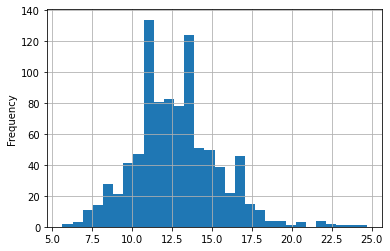

In [8]:
#wind gust assign nan when no gust. units m/s
df["wind_gust_o"]=pd.to_numeric(df["gust"], downcast="float",errors='coerce')*0.514444 

df.loc[df.wind_gust_o<0,"wind_gust_o"]="M"
#mask = (df.time > '2011-08-01') & (df.time <= '2011-11-05') & (df.wind_gust_o<0)
#df.loc[mask,["wind_gust_o","metar_o","time"]].set_index("time")
df["wind_gust_o"]=df["wind_gust_o"].fillna("M")
print(df["wind_gust_o"].describe())

pd.to_numeric(df["wind_gust_o"],downcast="float",errors="coerce").plot(kind="hist",bins=30,grid=True);

df.wind_gust_o.sample(30)

In [ ]:
import plotly.express as px
fig = px.line(df,x="time",y="wind_gust_o", title="wind_gust_o figure")
fig.show()


In [ ]:
#One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset.
#This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means
#transformed from inches to mm
df["prec_o"]=pd.to_numeric(df["p01i"], downcast="float",errors='coerce')*25.4
print(df["prec_o"].describe())

import plotly.express as px
fig = px.line(df,x="time",y="prec_o", title="Var figure")
fig.show()

In [9]:
#QNH in hpa
df["mslp_o"]=round(pd.to_numeric(df["alti"], downcast="float",errors='coerce')*33.8638,0)
df.loc[df.mslp_o<900,"mslp_o"]=np.nan
df.loc[df.mslp_o>1100,"mslp_o"]=np.nan
print(df["mslp_o"].describe())
print(df.loc[df["time"]=="2013-01-19 06:30:00",["mslp_o","metar"]])
print(df[["mslp_o","metar"]])

import plotly.express as px
fig = px.line(df,x="time",y="mslp_o", title="mslp_o figure")
fig.show()

count    23129.000000
mean      1018.804077
std          6.811141
min        994.000000
25%       1015.000000
50%       1019.000000
75%       1024.000000
max       1035.000000
Name: mslp_o, dtype: float64
Empty DataFrame
Columns: [mslp_o, metar]
Index: []
       mslp_o                                              metar
0      1027.0  LEVX 010000Z 22005KT 9999 BKN025 OVC050 09/08 ...
1      1027.0  LEVX 010030Z 23005KT 9999 BKN016 OVC045 09/08 ...
2      1026.0  LEVX 010100Z 22006KT 9999 OVC014 09/08 Q1026 N...
3      1026.0  LEVX 010130Z 22006KT 9999 OVC012 09/08 Q1026 N...
4      1026.0  LEVX 010200Z 22006KT 9000 OVC011 09/08 Q1026 N...
...       ...                                                ...
23124  1023.0  LEVX 142130Z 21003KT 9999 FEW032 10/09 Q1023 T...
23125  1023.0  LEVX 142200Z 22003KT 180V250 9999 FEW013 SCT03...
23126  1023.0  LEVX 142230Z VRB02KT 9999 SCT030 OVC035 11/10 ...
23127  1023.0  LEVX 142300Z 22004KT 9999 FEW014 BKN029 OVC034...
23128  1023.0  LEVX 142330Z 1

In [ ]:
#Sea Level Pressure in hPa . Unknown. Data are incompletely
pd.to_numeric(df["mslp"], downcast="float",errors='coerce').describe()


count    30121.000000
mean      1017.220886
std          7.230199
min        974.299988
25%       1014.200012
50%       1018.000000
75%       1021.299988
max       1037.699951
Name: mslp, dtype: float64

       visibility_o                                              metar
16192        9994.0  LEVX 261830Z 22008KT 9999 SCT030 BKN045 19/16 ...
144            97.0  LEVX 032000Z 19003KT 120V250 0100 R19/0500N R0...
9624         9994.0  LEVX 142000Z 01003KT 340V050 CAVOK 19/18 Q1015...
16976         595.0  LEVX 110430Z 24005KT 0600 R19/0900U R01/0800U ...
848          9994.0       LEVX 171800Z VRB02KT CAVOK 09/04 Q1024 NOSIG
10116        9994.0  LEVX 241700Z 19009KT 130V240 9999 BKN011 OVC01...
6311         9994.0  LEVX 071900Z 19008KT 150V230 9999 BKN020 BKN02...
7663         9994.0  LEVX 051230Z 27007KT 230V320 CAVOK 22/11 Q1023...
6446         9994.0  LEVX 101330Z 22014KT 170V240 9999 FEW036 SCT05...
21919        9994.0  LEVX 180800Z 26005KT 170V290 CAVOK 11/00 Q1027...
6362         9994.0  LEVX 081930Z VRB01KT 9999 SCT008 BKN015 12/11 ...
8684         9994.0  LEVX 261000Z 21004KT 120V270 CAVOK 21/14 Q1025...
7507         9994.0  LEVX 020630Z 03004KT 350V100 CAVOK 11/08 Q1017...
3228  

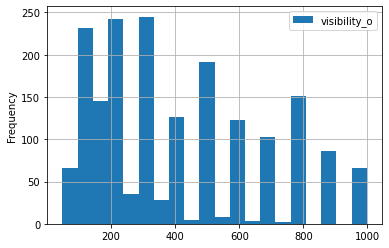

In [10]:
#visibility in meters
df["visibility_o"]=round(pd.to_numeric(df["vsby"], downcast="float",errors='coerce')*1609.344,0)
df.loc[df.visibility_o<=0,"visibility_o"]=np.nan
df.loc[df.visibility_o>9999,"visibility_o"]=9999
print(df[["visibility_o","metar"]].sample(20))
print(df["visibility_o"].describe())
df.loc[df.visibility_o<=1000,["visibility_o"]].plot(kind="hist",grid=True,bins=20);
import plotly.express as px
fig = px.line(df,x="time",y="visibility_o", title="Var figure")
fig.show()


In [11]:
#pd.to_numeric(df["skyl1"], downcast="float",errors='ignore').sample(100)
#df[["skyc1","skyl1","skyc2","skyl2","skyc3","skyl3","skyc4","skyl4","metar"]].sample(30)
df["skyc1_o"]=df["skyc1"]
df["skyc2_o"]=df["skyc2"]
df["skyc3_o"]=df["skyc3"]
df["skyl1_o"]=round(pd.to_numeric(df["skyl1"], downcast="float",errors='coerce')*0.3048,0)
df["skyl1_o"]=df.skyl1_o.fillna(-1)
df.loc[df.skyl1_o>2000,"skyl1_o"]=np.nan
df["skyl1_o"]=df["skyl1_o"].replace(-1,"M")
print(df[["skyl1_o","metar"]].describe())
print(df[["skyl1_o","metar"]].sample(30))
df["skyl2_o"]=round(pd.to_numeric(df["skyl2"], downcast="float",errors='coerce')*0.3048,0)
df["skyl2_o"]=df.skyl2_o.fillna("M")
print(df[["skyl2_o","metar"]].describe())
df["skyl3_o"]=round(pd.to_numeric(df["skyl3"], downcast="float",errors='coerce')*0.3048,0)
df["skyl3_o"]=df.skyl3_o.fillna("M")
print(df[["skyl3_o","metar"]].describe())
df["skyl4_o"]=round(pd.to_numeric(df["skyl4"], downcast="float",errors='coerce')*0.3048,0)
df["skyl4_o"]=df.skyl4_o.fillna("M")
print(df[["skyl4_o","metar"]].describe())

import plotly.express as px
fig = px.line(df,x="time",y="skyl4_o", title="Var figure")
fig.show()

       skyl1_o                                              metar
count    23129                                              23129
unique      57                                              23129
top          M  LEVX 010000Z 22005KT 9999 BKN025 OVC050 09/08 ...
freq     10460                                                  1
      skyl1_o                                              metar
5093    762.0  LEVX 131400Z 18008KT 110V240 9999 SCT025 BKN03...
21813       M       LEVX 160300Z VRB01KT CAVOK 09/05 Q1029 NOSIG
9061   1402.0  LEVX 030230Z 00000KT 9999 -RA SCT046 15/14 Q10...
18011    61.0  LEVX 011030Z 22010KT 9999 BCFG SCT002 07/05 Q1...
20861       M  LEVX 270600Z 03010KT 360V060 CAVOK 06/04 Q1024...
13867       M       LEVX 100330Z 24003KT CAVOK 17/14 Q1018 NOSIG
22190       M       LEVX 232130Z VRB02KT CAVOK 03/02 Q1014 NOSIG
16296   853.0  LEVX 281700Z VRB15G31KT 9999 SCT028TCU BKN054 ...
17023       M  LEVX 120430Z 20006KT 170V230 CAVOK 12/08 Q1019...
22528       M  LEVX 

In [12]:
#wxcodes
pd.options.display.max_rows=100
df.wxcodes.value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))
df["wxcodes_o"]=df["wxcodes"]

In [13]:
#metar
df["metar_o"]=df["metar"]

In [14]:
#last review
print(df[['time','temp_o','tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o','mslp_o',
       'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o', 'skyl1_o', 'skyl2_o',
       'skyl3_o', 'wxcodes_o', 'metar_o']].info())
df[['time','temp_o','tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o','mslp_o',
       'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o', 'skyl1_o', 'skyl2_o',
       'skyl3_o', 'wxcodes_o', 'metar_o']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23129 entries, 0 to 23128
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          23129 non-null  datetime64[ns]
 1   temp_o        23067 non-null  float32       
 2   tempd_o       23067 non-null  float32       
 3   rh_o          23067 non-null  float32       
 4   dir_o         23129 non-null  float32       
 5   spd_o         23123 non-null  float32       
 6   wind_gust_o   23129 non-null  object        
 7   mslp_o        23129 non-null  float32       
 8   visibility_o  23129 non-null  float32       
 9   skyc1_o       23129 non-null  object        
 10  skyc2_o       23129 non-null  object        
 11  skyc3_o       23129 non-null  object        
 12  skyl1_o       23129 non-null  object        
 13  skyl2_o       23129 non-null  object        
 14  skyl3_o       23129 non-null  object        
 15  wxcodes_o     23104 non-null  object

temp_o       tempd_o          rh_o         dir_o         spd_o  \
count  23067.000000  23067.000000  23067.000000  23129.000000  23123.000000   
mean     287.014191    283.057800     79.267578    155.337326      3.056674   
std        5.815952      5.283319     16.916842    113.621368      1.914485   
min      272.000000    266.000000     20.459999     -1.000000      0.000000   
25%      283.000000    280.000000     67.750000     20.000000      1.543332   
50%      286.000000    283.000000     82.250000    200.000000      2.572220   
75%      290.000000    287.000000     93.599998    240.000000      4.115552   
max      311.000000    295.000000    100.000000    360.000000     17.491096   

             mslp_o  visibility_o  
count  23129.000000  23129.000000  
mean    1018.804077   8528.193359  
std        6.811141   3084.567871  
min      994.000000     48.000000  
25%     1015.000000   9994.000000  
50%     1019.000000   9994.000000  
75%     1024.000000   9994.000000  
max     1035.000000   9994.000000

In [ ]:
df=df.drop_duplicates(subset="time")

In [15]:
#save results
from google.colab import drive
drive.mount('/content/drive')
df[['time','temp_o','tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o','mslp_o',
       'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o', 'skyl1_o', 'skyl2_o',
       'skyl3_o', 'wxcodes_o', 'metar_o']].to_csv("LECOY2021Y2023.csv")

Mounted at /content/drive


In [ ]:
df[['time','temp_o','tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o','mslp_o',
       'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o', 'skyl1_o', 'skyl2_o',
       'skyl3_o', 'wxcodes_o', 'metar_o']]

time      temp_o     tempd_o       rh_o  dir_o     spd_o  \
0     2018-01-01 00:00:00  276.149994  275.149994  93.139999   -1.0  0.514444   
1     2018-01-01 00:30:00  276.149994  274.149994  86.690002    0.0  0.000000   
2     2018-01-01 01:00:00  275.149994  274.149994  93.080002   70.0  3.086664   
3     2018-01-01 01:30:00  276.149994  273.149994  80.650002    0.0  0.000000   
4     2018-01-01 02:00:00  275.149994  274.149994  93.080002   -1.0  0.514444   
...                   ...         ...         ...        ...    ...       ...   
17687 2018-12-30 21:30:00  279.149994  271.149994  56.480000   10.0  2.057776   
17688 2018-12-30 22:00:00  278.149994  271.149994  60.540001   50.0  1.028888   
17689 2018-12-30 22:30:00  277.149994  271.149994  64.930000  100.0  1.028888   
17690 2018-12-30 23:00:00  276.149994  271.149994  69.669998   -1.0  1.028888   
17691 2018-12-30 23:30:00  276.149994  271.149994  69.669998   70.0  2.057776   

      wind_gust_o  mslp_o  visibility_o skyc1_o skyc2_o skyc3_o skyl1_o  \
0               M  1026.0        9994.0     NCD       M       M       M   
1               M  1026.0        9994.0     NCD       M       M       M   
2               M  1026.0        9994.0     NCD       M       M       M   
3               M  1026.0        9994.0     NCD       M       M       M   
4               M  1027.0        9994.0     NCD       M       M       M   
...           ...     ...           ...     ...     ...     ...     ...   
17687           M  1031.0        9994.0       M       M       M       M   
17688           M  1031.0        9994.0       M       M       M       M   
17689           M  1031.0        9994.0       M       M       M       M   
17690           M  1031.0        9994.0       M       M       M       M   
17691           M  1031.0        7998.0     NCD       M       M       M   

      skyl2_o skyl3_o wxcodes_o  \
0           M       M         M   
1           M       M         M   
2           M       M         M   
3           M       M         M   
4           M       M         M   
...       ...     ...       ...   
17687       M       M         M   
17688       M       M         M   
17689       M       M         M   
17690       M       M         M   
17691       M       M         M   

                                               metar_o  
0       LEPP 010000Z AUTO VRB01KT 9999 NCD 03/02 Q1026  
1       LEPP 010030Z AUTO 00000KT 9999 NCD 03/01 Q1026  
2       LEPP 010100Z AUTO 07006KT 9999 NCD 02/01 Q1026  
3       LEPP 010130Z AUTO 00000KT 9999 NCD 03/00 Q1026  
4       LEPP 010200Z AUTO VRB01KT 9999 NCD 02/01 Q1027  
...                                                ...  
17687  LEPP 302130Z 01004KT 320V080 CAVOK 06/M02 Q1031  
17688          LEPP 302200Z 05002KT CAVOK 05/M02 Q1031  
17689          LEPP 302230Z 10002KT CAVOK 04/M02 Q1031  
17690          LEPP 302300Z VRB02KT CAVOK 03/M02 Q1031  
17691  LEPP 302330Z AUTO 07004KT 8000 NCD 03/M02 Q1031  

[17692 rows x 17 columns]

In [ ]:
df.to_csv("LEPP2018.csv")

In [ ]:
data=collections.Counter(df["wxcodes"])
data_sorted = {k: v for k, v in sorted(data.items(), key=lambda x: x[1])}
print(data_sorted)

NameError: ignored